In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pickle
from pathlib import Path

import sys
sys.path.append('../../')

import phys_ml.visualization.vertex_visualization as vertvis
from phys_ml.analysis.vertex import *
from phys_ml.evaluation import vertex as verteval
from phys_ml.load_data.vertex import *
from phys_ml.trainer.vertex import *
from phys_ml.util import slurm_generate

In [ ]:
# back_up existing info_files
info_fn = 'eval_info.pkl'
verteval.backup_info(info_fn)

In [ ]:
###############    TEST RUN    ################
info_fn = 'eval_info_test.pkl'
info_test = verteval.load_info_dict(info_fn)
trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                            subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                            config_kwargs={'path_train': '../../../frgs_6d', 'hidden_dims': [128, 64, 32],
                                    	   'sample_count_per_vertex': 2000, 'test_ratio': 0.33, 'epochs': 5,
                                           'subset': 3, 'subset_shuffle': False})

## dev

In [ ]:
!pip show lightning

In [ ]:
!pip show torch

In [ ]:
verteval.eval_train(trainer, info_test, info_fn, [128, 64, 32])

## slurm

In [ ]:
# config
base_dir = '/gpfs/data/fs71925/shepp123/'
sample_count = int((2000 * 576 * 3) / (24 * 6))
hidden_dims = [128, 64, 32]
trainer_kwargs = {
    'config_name': 'confmod_auto_encoder.json', 
    'subconfig_name': 'AUTO_ENCODER_VERTEX_24X6', 
    'config_kwargs': {
        'path_train': base_dir + 'frgs_6d',
        'hidden_dims': hidden_dims,
        'epochs': 100,
        'sample_count_per_vertex': sample_count, 
        'test_ratio': 0.2, 
        'subset': -1, 
        'subset_shuffle': False, 
        'devices': 'auto', 
        'device_type': 'gpu', 
        'num_dataloader_workers': 8, 
        'batch_size': 2048,
    }
}
slurm_options = slurm_generate.SlurmOptions(qos='zen3_0512_a100x2', time='00:10:00')
slurm_kwargs = {'project_name': 'vertex_24x6', 'pyenv_dir': base_dir + 'pyenv', 
                'trainer': 'vertex.VertexTrainer24x6', 'slurm_options': slurm_options, 'trainer_kwargs': trainer_kwargs}

In [ ]:
# test run
slurm_options_dev = slurm_generate.SlurmOptions(qos='zen3_0512_a100x2_devel', time='00:10:00')
slurm_generate.create(project_name='vertex_24x6', script_name='vsc_test', 
                      pyenv_dir= base_dir + 'PhysML/.venv', slurm_options=slurm_options_dev, 
                      trainer='vertex.VertexTrainer24x6', trainer_kwargs=trainer_kwargs)

In [ ]:
# 02: high samples, low epochs
trainer_kwargs['config_kwargs']['sample_count_per_vertex'] = sample_count
trainer_kwargs['config_kwargs']['batch_size'] = 2048
trainer_kwargs['config_kwargs']['epochs'] = 100
slurm_options.time = '03:30:00'
slurm_generate.create(script_name='s24000_e100', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 02: low samples, high epochs
trainer_kwargs['config_kwargs']['sample_count_per_vertex'] = 2000
trainer_kwargs['config_kwargs']['batch_size'] = 128
trainer_kwargs['config_kwargs']['epochs'] = 1000
slurm_options.time = '03:00:00'
slurm_generate.create(script_name='s2000_e1000', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 02: low samples, low epochs
trainer_kwargs['config_kwargs']['sample_count_per_vertex'] = 2000
trainer_kwargs['config_kwargs']['batch_size'] = 128
trainer_kwargs['config_kwargs']['epochs'] = 100
slurm_options.time = '00:30:00'
slurm_generate.create(script_name='s2000_e100', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 03: [128, 64, 32]
trainer_kwargs['config_kwargs']['sample_count_per_vertex'] = ?
trainer_kwargs['config_kwargs']['batch_size'] = ?
trainer_kwargs['config_kwargs']['epochs'] = ?
trainer_kwargs['config_kwargs']['hidden_dims'] = [128, 64, 32]
slurm_options.time = ?
slurm_generate.create(script_name='128_64_32', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 03: [128, 64, 32, 16]
trainer_kwargs['config_kwargs']['hidden_dims'] = [128, 64, 32, 16]
slurm_options.time = ?
slurm_generate.create(script_name='128_64_32_16', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 03: [128, 64, 32, 8]
trainer_kwargs['config_kwargs']['hidden_dims'] = [128, 64, 32, 8]
slurm_generate.create(script_name='128_64_32_8', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 03: [128, 32, 16, 4]
trainer_kwargs['config_kwargs']['hidden_dims'] = [128, 32, 16, 4]
slurm_generate.create(script_name='128_32_16_4', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 04: 80% discarded
slurm_kwargs['trainer'] = 'vertex.VertexTrainer24x6Sparse'
trainer_kwargs['subconfig_name'] = 'AUTO_ENCODER_VERTEX_24X6_SPARSE'
trainer_kwargs['config_kwargs']['sample_count_per_vertex'] = ?
trainer_kwargs['config_kwargs']['batch_size'] = ?
trainer_kwargs['config_kwargs']['epochs'] = ?
trainer_kwargs['config_kwargs']['hidden_dims'] = [128, 64, 32]
trainer_kwargs['config_kwargs']['sparsify_rate'] = 0.8
slurm_options.time = ?
slurm_generate.create(script_name='sparse_80', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 04: 90% discarded
trainer_kwargs['config_kwargs']['sparsify_rate'] = 0.9
slurm_generate.create(script_name='sparse_90', **slurm_kwargs)
# job-id:
# dir:

# 01 Full training

* training on all vertices
* 24,000 samples -> with smaller sample-vectors (size=144) of the 24^6-vertex this results in same amount of data points as training on 576^3-vertex with 2000 samples

In [ ]:
info_fn = 'eval_info.pkl'
info = verteval.load_info_dict(info_fn)
sample_count = int((2000 * 576 * 3) / (24 * 6))
config_kwargs={'path_train': '../../../frgs_6d', 
               'hidden_dims': [128, 64, 32],
               'epochs': 100,
               'sample_count_per_vertex': sample_count, 
               'test_ratio': 0.2, 
               'subset': None, 
               'subset_shuffle': False, 
               'devices': 'auto', 
               'num_dataloader_workers': 4, 
               'strategy': 'auto', 
               'batch_size': 2048}


def init_trainer(device_type: Literal['cpu', 'gpu'] = 'gpu', **kwargs) -> VertexTrainer24x6:
    config_kwargs['device_type'] = device_type
    for k, v in kwargs.items():
        config_kwargs[k] = v
    trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                                subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                                config_kwargs=config_kwargs)
    return trainer

## train

In [ ]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32], resume=True, version=1)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 32.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
32.6 K    Trainable params
0         Non-trainable params
32.6 K    Total params
0.130     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 41004: 'val_loss' reached 0.04766 (best 0.04766), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=0-step=41004.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 1, global step 82008: 'val_loss' reached

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 123012: 'val_loss' reached 0.01302 (best 0.01302), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=2-step=123012.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 164016: 'val_loss' reached 0.00906 (best 0.00906), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=3-step=164016.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 205020: 'val_loss' reached 0.00633 (best 0.00633), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=4-step=205020.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 246024: 'val_loss' reached 0.00421 (best 0.00421), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=5-step=246024.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 287028: 'val_loss' reached 0.00266 (best 0.00266), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=6-step=287028.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 328032: 'val_loss' reached 0.00163 (best 0.00163), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=7-step=328032.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 369036: 'val_loss' reached 0.00122 (best 0.00122), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=8-step=369036.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 410040: 'val_loss' reached 0.00084 (best 0.00084), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=9-step=410040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 10, global step 451044: 'val_loss' reached 0.00119 (best 0.00084), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=10-step=451044.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 492048: 'val_loss' reached 0.00029 (best 0.00029), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=11-step=492048.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 533052: 'val_loss' reached 0.00019 (best 0.00019), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=12-step=533052.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 574056: 'val_loss' reached 0.00020 (best 0.00019), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=13-step=574056.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 615060: 'val_loss' reached 0.00022 (best 0.00019), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=14-step=615060.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 15, global step 656064: 'val_loss' reached 0.00010 (best 0.00010), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=15-step=656064.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 697068: 'val_loss' reached 0.00012 (best 0.00010), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=16-step=697068.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 738072: 'val_loss' reached 0.00009 (best 0.00009), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=17-step=738072.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 779076: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=18-step=779076.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 820080: 'val_loss' reached 0.00011 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=19-step=820080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 861084: 'val_loss' reached 0.00026 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=20-step=861084.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 21, global step 902088: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 943092: 'val_loss' reached 0.00010 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=22-step=943092.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 984096: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=23-step=984096.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 1025100: 'val_loss' reached 0.00020 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=24-step=1025100.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 1066104: 'val_loss' reached 0.00014 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=25-step=1066104.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 1107108: 'val_loss' reached 0.00008 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=26-step=1107108.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 1148112: 'val_loss' reached 0.00013 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=27-step=1148112.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 1189116: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=28-step=1189116.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 1230120: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=29-step=1230120.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 1271124: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 1312128: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 1353132: 'val_loss' reached 0.00010 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=32-step=1353132.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 1394136: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 1435140: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=34-step=1435140.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 1476144: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 1517148: 'val_loss' reached 0.00009 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=36-step=1517148.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 1558152: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 1599156: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1640160: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=39-step=1640160.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 1681164: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 1722168: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 1763172: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 1804176: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 44, global step 1845180: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=44-step=1845180.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 1886184: 'val_loss' reached 0.00008 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=45-step=1886184.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 1927188: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 47, global step 1968192: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 2009196: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 2050200: 'val_loss' reached 0.00006 (best 0.00006), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=49-step=2050200.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 2091204: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 2173212: 'val_loss' reached 0.00005 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=52-step=2173212.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 2214216: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 2255220: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 2296224: 'val_loss' reached 0.00005 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=55-step=2296224.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 56, global step 2337228: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 2378232: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 2419236: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 2501244: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 2542248: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 62, global step 2583252: 'val_loss' was 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 2624256: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 2665260: 'val_loss' reached 0.00006 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=64-step=2665260.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 2706264: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 2747268: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 2788272: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 2829276: 'val_loss' reached 0.00005 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=68-step=2829276.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 2870280: 'val_loss' reached 0.00006 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=69-step=2870280.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 2911284: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 2952288: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 2993292: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 3034296: 'val_loss' reached 0.00006 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=73-step=3034296.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 3075300: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 3116304: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 3157308: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 3198312: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 3239316: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 3280320: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 3321324: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 3362328: 'val_loss' reached 0.00004 (best 0.00004), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=81-step=3362328.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 3403332: 'val_loss' reached 0.00005 (best 0.00004), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=82-step=3403332.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 3444336: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 3485340: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 3526344: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 3567348: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 3649356: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 3690360: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 3731364: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 3813372: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 3854376: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 3895380: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 3936384: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 3977388: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 4018392: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 4059396: 'val_loss' reached 0.00005 (best 0.00004), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=98-step=4059396.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 4100400: 'val_loss' was not in top 10
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 32
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5'


In [ ]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32, 16], resume=True, version=6)

 >>> Load checkpoint from '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=89-step=3690360.ckpt'
 >>> Loaded checkpoint


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints exists and is not empty.
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=89-step=3690360.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 33.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
33.6 K    Trainable params
0         Non-trainable param

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 3739320: 'val_loss' reached 0.00611 (best 0.00591), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=90-step=3739320.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 3788280: 'val_loss' reached 0.00600 (best 0.00591), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=91-step=3788280.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 3837240: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 3886200: 'val_loss' reached 0.00598 (best 0.00591), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=93-step=3886200.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 3935160: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 3984120: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 4033080: 'val_loss' reached 0.00604 (best 0.00591), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=96-step=4033080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 4082040: 'val_loss' reached 0.00575 (best 0.00575), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=97-step=4082040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 4131000: 'val_loss' reached 0.00586 (best 0.00575), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=98-step=4131000.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 4179960: 'val_loss' was not in top 10
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 16
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6'


In [ ]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32, 8])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 33.1 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
33.1 K    Trainable params
0         Non-trainable params
33.1 K    Total params
0.132     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 48960: 'val_loss' reached 0.26078 (best 0.26078), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=0-step=48960.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 97920: 'val_loss' reached 0.22823 (best 0.22823), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=1-step=97920.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 146880: 'val_loss' reached 0.22066 (best 0.22066), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=2-step=146880.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 3, global step 195840: 'val_loss' reached 0.18741 (best 0.18741), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=3-step=195840.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 244800: 'val_loss' reached 0.16373 (best 0.16373), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=4-step=244800.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 293760: 'val_loss' reached 0.15273 (best 0.15273), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=5-step=293760.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 342720: 'val_loss' reached 0.14655 (best 0.14655), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=6-step=342720.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 391680: 'val_loss' reached 0.13982 (best 0.13982), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=7-step=391680.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 440640: 'val_loss' reached 0.13571 (best 0.13571), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=8-step=440640.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 489600: 'val_loss' reached 0.13203 (best 0.13203), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=9-step=489600.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 538560: 'val_loss' reached 0.13214 (best 0.13203), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=10-step=538560.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 587520: 'val_loss' reached 0.12783 (best 0.12783), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=11-step=587520.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 636480: 'val_loss' reached 0.12690 (best 0.12690), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=12-step=636480.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 685440: 'val_loss' reached 0.12403 (best 0.12403), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=13-step=685440.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 734400: 'val_loss' reached 0.12256 (best 0.12256), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=14-step=734400.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 783360: 'val_loss' reached 0.12215 (best 0.12215), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=15-step=783360.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 832320: 'val_loss' reached 0.12173 (best 0.12173), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=16-step=832320.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 881280: 'val_loss' reached 0.11980 (best 0.11980), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=17-step=881280.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 930240: 'val_loss' reached 0.11814 (best 0.11814), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=18-step=930240.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 979200: 'val_loss' reached 0.11749 (best 0.11749), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=19-step=979200.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 1028160: 'val_loss' reached 0.12358 (best 0.11749), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=20-step=1028160.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 1077120: 'val_loss' reached 0.11608 (best 0.11608), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=21-step=1077120.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 1126080: 'val_loss' reached 0.11562 (best 0.11562), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=22-step=1126080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 1175040: 'val_loss' reached 0.11446 (best 0.11446), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=23-step=1175040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 1224000: 'val_loss' reached 0.11546 (best 0.11446), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=24-step=1224000.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 1272960: 'val_loss' reached 0.11506 (best 0.11446), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=25-step=1272960.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 1321920: 'val_loss' reached 0.11431 (best 0.11431), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=26-step=1321920.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 1370880: 'val_loss' reached 0.11324 (best 0.11324), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=27-step=1370880.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 1419840: 'val_loss' reached 0.11505 (best 0.11324), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=28-step=1419840.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 1468800: 'val_loss' reached 0.11101 (best 0.11101), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=29-step=1468800.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 1517760: 'val_loss' reached 0.11382 (best 0.11101), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=30-step=1517760.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 1566720: 'val_loss' reached 0.11370 (best 0.11101), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=31-step=1566720.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 1615680: 'val_loss' reached 0.11172 (best 0.11101), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=32-step=1615680.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 1664640: 'val_loss' reached 0.10910 (best 0.10910), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=33-step=1664640.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 1713600: 'val_loss' reached 0.11095 (best 0.10910), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=34-step=1713600.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 1762560: 'val_loss' reached 0.11210 (best 0.10910), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=35-step=1762560.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 1811520: 'val_loss' reached 0.11011 (best 0.10910), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=36-step=1811520.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 1860480: 'val_loss' reached 0.11348 (best 0.10910), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=37-step=1860480.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 1909440: 'val_loss' reached 0.11124 (best 0.10910), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=38-step=1909440.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1958400: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 2007360: 'val_loss' reached 0.10903 (best 0.10903), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=40-step=2007360.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 2056320: 'val_loss' reached 0.10941 (best 0.10903), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=41-step=2056320.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 2105280: 'val_loss' reached 0.10927 (best 0.10903), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=42-step=2105280.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 2154240: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 2203200: 'val_loss' reached 0.10674 (best 0.10674), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=44-step=2203200.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 2252160: 'val_loss' reached 0.10919 (best 0.10674), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=45-step=2252160.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 2301120: 'val_loss' reached 0.10816 (best 0.10674), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=46-step=2301120.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 2350080: 'val_loss' reached 0.10967 (best 0.10674), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=47-step=2350080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 2399040: 'val_loss' reached 0.10873 (best 0.10674), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=48-step=2399040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 2448000: 'val_loss' reached 0.10894 (best 0.10674), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=49-step=2448000.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 2496960: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 2545920: 'val_loss' reached 0.10485 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=51-step=2545920.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 2594880: 'val_loss' reached 0.10757 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=52-step=2594880.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 2643840: 'val_loss' reached 0.10583 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=53-step=2643840.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 2692800: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 2741760: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 2790720: 'val_loss' reached 0.10762 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=56-step=2790720.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 2839680: 'val_loss' reached 0.10747 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=57-step=2839680.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 2888640: 'val_loss' reached 0.10754 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=58-step=2888640.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 2937600: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 2986560: 'val_loss' reached 0.10850 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=60-step=2986560.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 3035520: 'val_loss' reached 0.10512 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=61-step=3035520.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 3084480: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 3133440: 'val_loss' reached 0.10703 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=63-step=3133440.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 3182400: 'val_loss' reached 0.08722 (best 0.08722), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=64-step=3182400.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 3231360: 'val_loss' reached 0.08130 (best 0.08130), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=65-step=3231360.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 3280320: 'val_loss' reached 0.08100 (best 0.08100), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=66-step=3280320.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 3329280: 'val_loss' reached 0.07949 (best 0.07949), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=67-step=3329280.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 3378240: 'val_loss' reached 0.07785 (best 0.07785), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=68-step=3378240.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 3427200: 'val_loss' reached 0.07670 (best 0.07670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=69-step=3427200.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 3476160: 'val_loss' reached 0.07694 (best 0.07670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=70-step=3476160.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 3525120: 'val_loss' reached 0.07814 (best 0.07670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=71-step=3525120.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 3574080: 'val_loss' reached 0.07852 (best 0.07670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=72-step=3574080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 3623040: 'val_loss' reached 0.08624 (best 0.07670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=73-step=3623040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 3672000: 'val_loss' reached 0.08188 (best 0.07670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=74-step=3672000.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 3720960: 'val_loss' reached 0.07643 (best 0.07643), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=75-step=3720960.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 3769920: 'val_loss' reached 0.07778 (best 0.07643), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=76-step=3769920.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 3818880: 'val_loss' reached 0.07883 (best 0.07643), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=77-step=3818880.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 3867840: 'val_loss' reached 0.07405 (best 0.07405), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=78-step=3867840.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 3916800: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 3965760: 'val_loss' reached 0.07338 (best 0.07338), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=80-step=3965760.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 4014720: 'val_loss' reached 0.07446 (best 0.07338), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=81-step=4014720.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 4063680: 'val_loss' reached 0.07607 (best 0.07338), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=82-step=4063680.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 4112640: 'val_loss' reached 0.07332 (best 0.07332), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=83-step=4112640.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 4161600: 'val_loss' reached 0.07369 (best 0.07332), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=84-step=4161600.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 4210560: 'val_loss' reached 0.07280 (best 0.07280), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=85-step=4210560.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 4259520: 'val_loss' reached 0.07318 (best 0.07280), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=86-step=4259520.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 4308480: 'val_loss' reached 0.07230 (best 0.07230), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=87-step=4308480.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 4357440: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 4406400: 'val_loss' reached 0.07572 (best 0.07230), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=89-step=4406400.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 4455360: 'val_loss' reached 0.07556 (best 0.07230), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=90-step=4455360.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 4504320: 'val_loss' reached 0.07376 (best 0.07230), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=91-step=4504320.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 4553280: 'val_loss' reached 0.07522 (best 0.07230), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=92-step=4553280.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 4602240: 'val_loss' reached 0.07230 (best 0.07230), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=93-step=4602240.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 4651200: 'val_loss' reached 0.07312 (best 0.07230), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=94-step=4651200.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 4700160: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 4749120: 'val_loss' reached 0.07210 (best 0.07210), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=96-step=4749120.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 4798080: 'val_loss' reached 0.07064 (best 0.07064), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=97-step=4798080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 4847040: 'val_loss' reached 0.07279 (best 0.07064), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=98-step=4847040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 4896000: 'val_loss' was not in top 10
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 8
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0'


In [ ]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 32, 16, 4])

 >>> Load checkpoint from '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=70-step=3476160.ckpt'
 >>> Loaded checkpoint


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints exists and is not empty.
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=70-step=3476160.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 24.7 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
24.7 K    Trainable params
0         Non-trainable param

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 3525120: 'val_loss' reached 0.19077 (best 0.19050), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=71-step=3525120.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 3574080: 'val_loss' reached 0.19157 (best 0.19050), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=72-step=3574080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 3623040: 'val_loss' reached 0.19102 (best 0.19050), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=73-step=3623040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 3672000: 'val_loss' reached 0.18994 (best 0.18994), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=74-step=3672000.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 3720960: 'val_loss' reached 0.19004 (best 0.18994), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=75-step=3720960.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 3769920: 'val_loss' reached 0.18874 (best 0.18874), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=76-step=3769920.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 3818880: 'val_loss' reached 0.18923 (best 0.18874), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=77-step=3818880.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 3867840: 'val_loss' reached 0.18995 (best 0.18874), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=78-step=3867840.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 3916800: 'val_loss' reached 0.18968 (best 0.18874), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=79-step=3916800.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 3965760: 'val_loss' reached 0.18830 (best 0.18830), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=80-step=3965760.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 4014720: 'val_loss' reached 0.18807 (best 0.18807), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=81-step=4014720.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 4063680: 'val_loss' reached 0.19007 (best 0.18807), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=82-step=4063680.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 4112640: 'val_loss' reached 0.18936 (best 0.18807), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=83-step=4112640.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 4161600: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 4210560: 'val_loss' reached 0.18873 (best 0.18807), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=85-step=4210560.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 4259520: 'val_loss' reached 0.18781 (best 0.18781), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=86-step=4259520.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 4308480: 'val_loss' reached 0.18770 (best 0.18770), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=87-step=4308480.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 4357440: 'val_loss' reached 0.18843 (best 0.18770), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=88-step=4357440.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 4406400: 'val_loss' reached 0.18814 (best 0.18770), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=89-step=4406400.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 4455360: 'val_loss' reached 0.18805 (best 0.18770), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=90-step=4455360.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 4504320: 'val_loss' reached 0.18715 (best 0.18715), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=91-step=4504320.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 4553280: 'val_loss' reached 0.18757 (best 0.18715), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=92-step=4553280.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 93, global step 4602240: 'val_loss' reached 0.18654 (best 0.18654), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=93-step=4602240.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 4651200: 'val_loss' reached 0.18604 (best 0.18604), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=94-step=4651200.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 4700160: 'val_loss' reached 0.18569 (best 0.18569), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=95-step=4700160.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 4749120: 'val_loss' reached 0.18752 (best 0.18569), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=96-step=4749120.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 4798080: 'val_loss' reached 0.18648 (best 0.18569), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=97-step=4798080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 4847040: 'val_loss' reached 0.18667 (best 0.18569), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=98-step=4847040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 4896000: 'val_loss' reached 0.18659 (best 0.18569), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=99-step=4896000.ckpt' as top 10
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 4
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1'


## evaluate prediction

In [ ]:
i = 18
axis = trainer.config.construction_axis
k, other_k = (axis + 1) // 2, 3
slice_idx_3d = i * 24 + i
nrows, ncols = 2, 3

test_file = 'tp0.020000_mu0.080000.h5'
test_file3d = '../../../frgs/' + test_file
test_file6d = '../../../frgs_6d/' + test_file

info = verteval.load_info_dict(info_fn)

vertex3 = AutoEncoderVertexDataset.load_from_file(test_file3d)
vertex6 = AutoEncoderVertex24x6Dataset.load_from_file(test_file6d)

keys = [f'n={x['latent_dim']}' for x in info]
trainer = init_trainer(device_type='cpu')

### predict 24x24 slice

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=87-step=3608352.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=87-step=3608352.ckpt
/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/loops/prediction_loop.py:255: predict returned None if it was on purpose, ignore this warning...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=87-step=3608352.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=87-step=3608352.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=93-step=4602240.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=93-step=4602240.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=93-step=4602240.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=93-step=4602240.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=32: RMSE=0.0063
   latent_dim=16: RMSE=0.0232
   latent_dim=8: RMSE=0.1736
   latent_dim=4: RMSE=0.2565


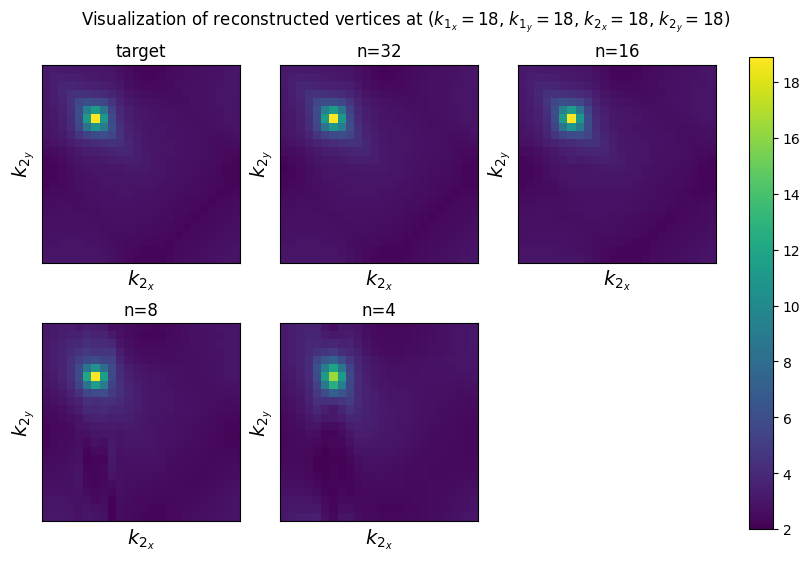

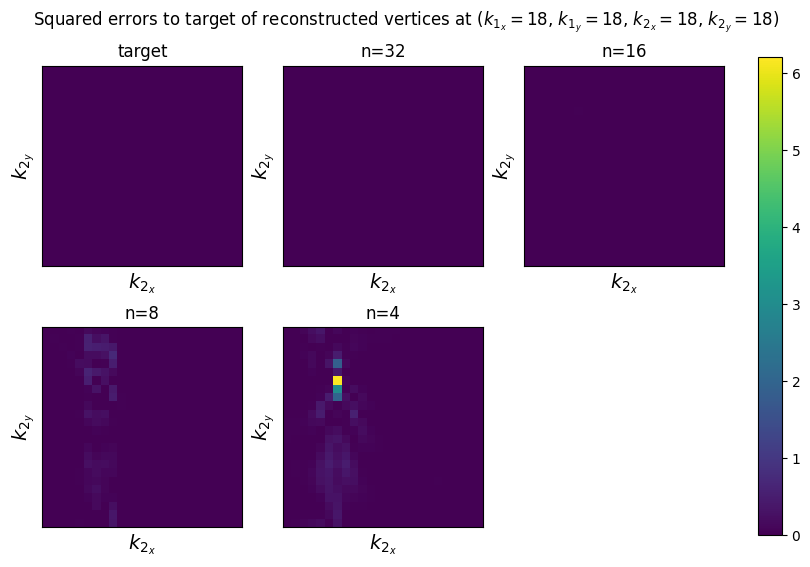

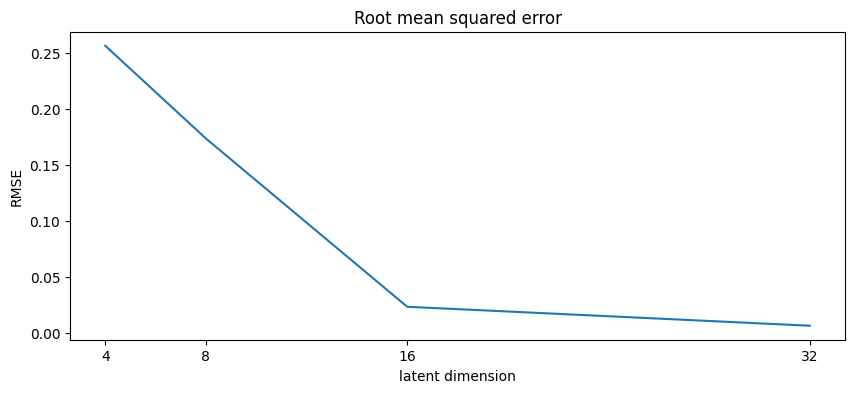

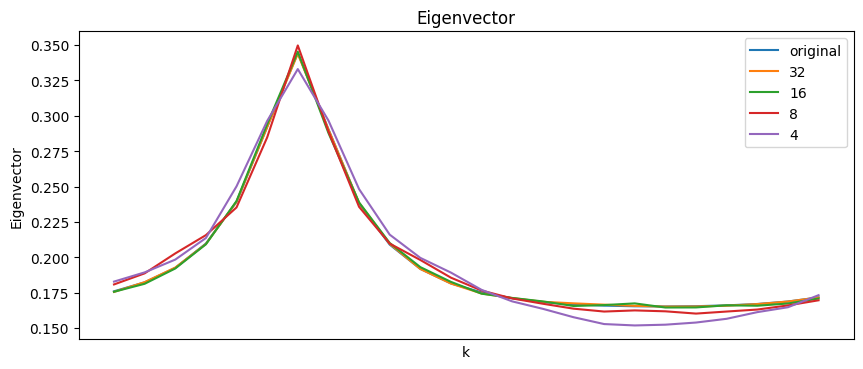

In [ ]:
# RESULTS FOR 2-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i, i, i), axis, keys, nrows, ncols, 
                             trainer.predict_slice2d, fixed_idcs=(i, i, i, i))

### predict 576x576 slice

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=87-step=3608352.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=87-step=3608352.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=87-step=3608352.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=87-step=3608352.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=93-step=4602240.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=93-step=4602240.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=93-step=4602240.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=93-step=4602240.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=32: RMSE=0.0060
   latent_dim=16: RMSE=0.0272
   latent_dim=8: RMSE=0.1490
   latent_dim=4: RMSE=0.2845


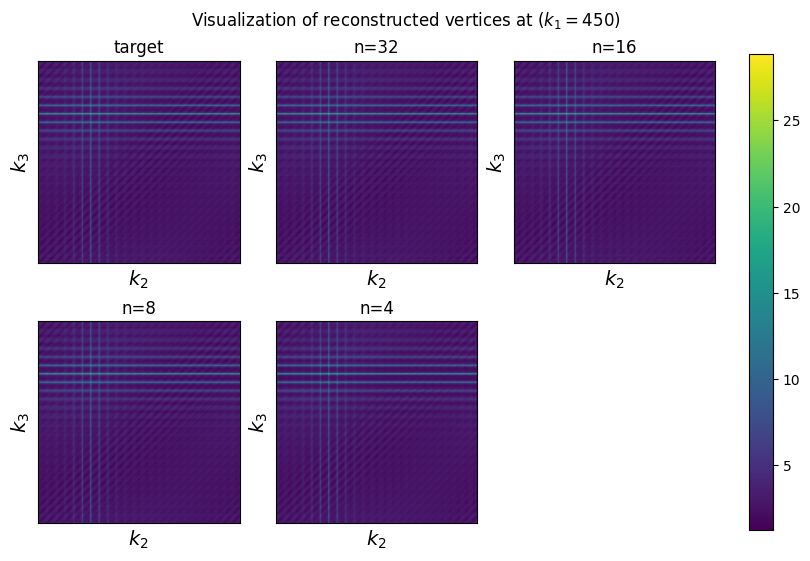

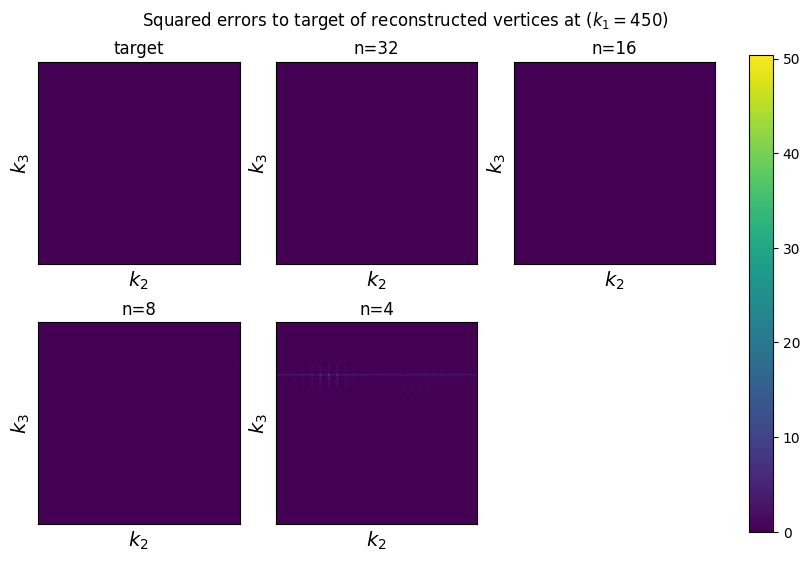

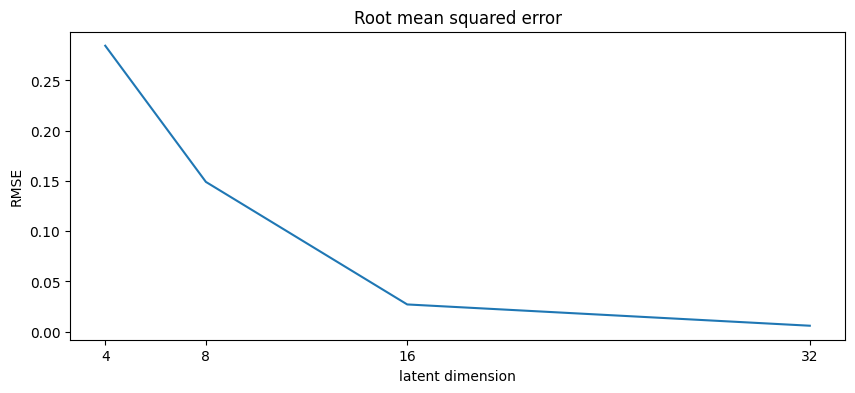

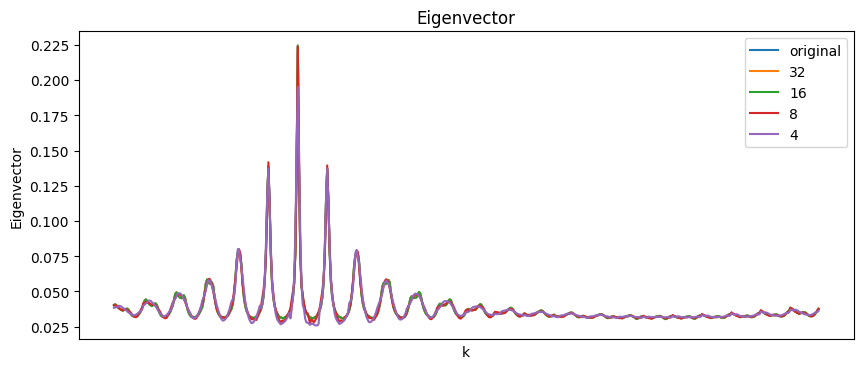

In [ ]:
# RESULTS FOR 4-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i), (k, other_k), keys, nrows, ncols, 
                             trainer.predict_slice4d, fixed_idcs=(i, i), other_k=other_k)

### predict full vertex

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=87-step=3608352.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=87-step=3608352.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=87-step=3608352.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=87-step=3608352.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=93-step=4602240.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=93-step=4602240.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=93-step=4602240.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=93-step=4602240.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=32: RMSE=0.0062
   latent_dim=16: RMSE=0.0294
   latent_dim=8: RMSE=0.1454
   latent_dim=4: RMSE=0.3022


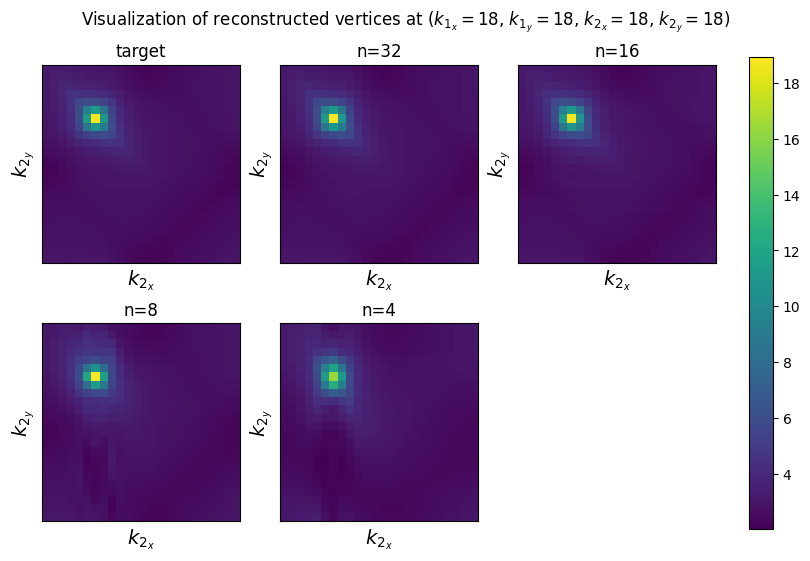

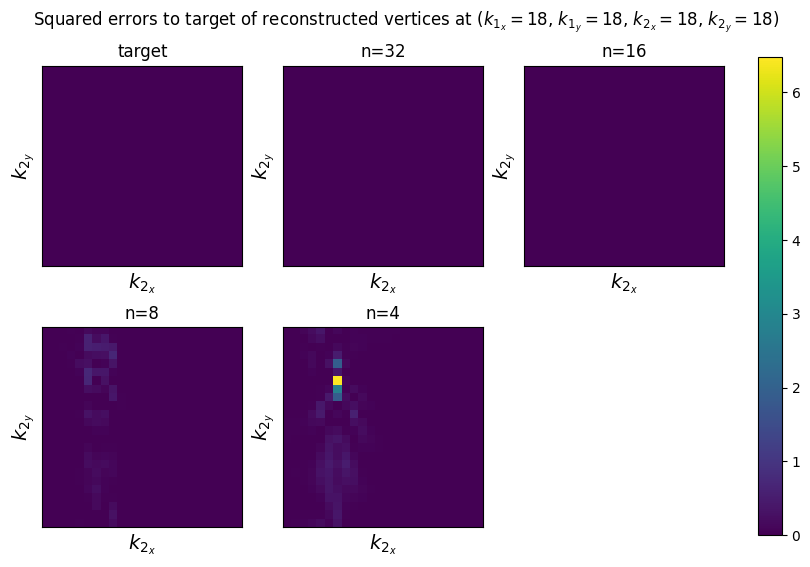

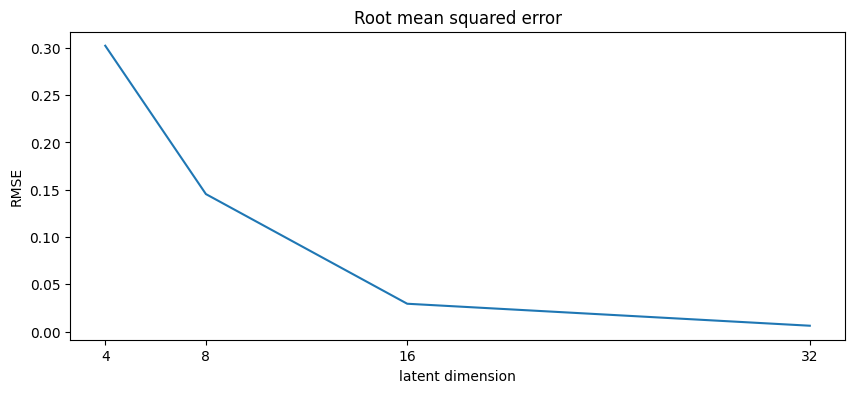

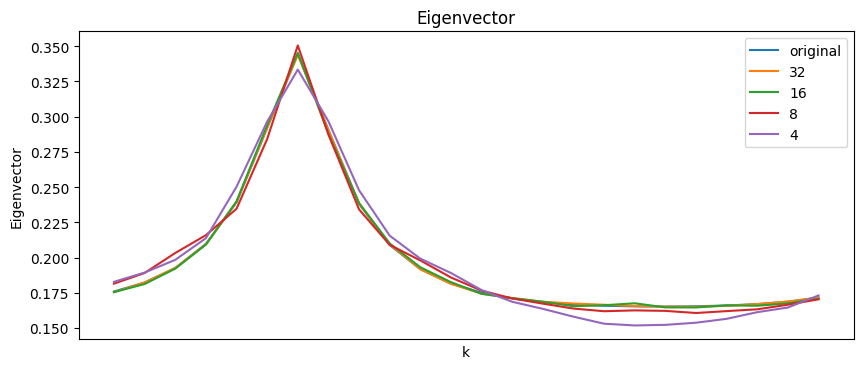

In [ ]:
# RESULTS FOR 6-DIMENSIONAL PREDICTION
# for 6d-data
slice_at = (i, i, i, i)
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, slice_at, axis, keys, nrows, ncols, 
                             predict_func=trainer.predict)

RESULTS:
   latent_dim=32: RMSE=0.0062
   latent_dim=16: RMSE=0.0294
   latent_dim=8: RMSE=0.1454
   latent_dim=4: RMSE=0.3022


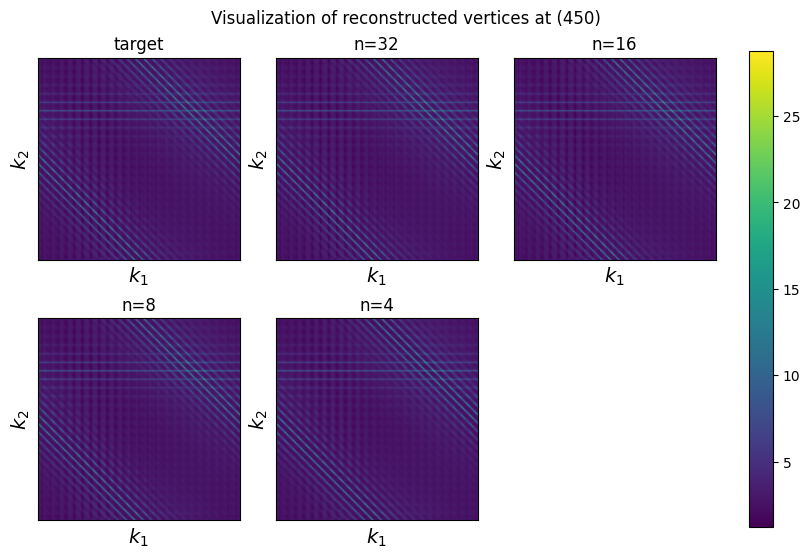

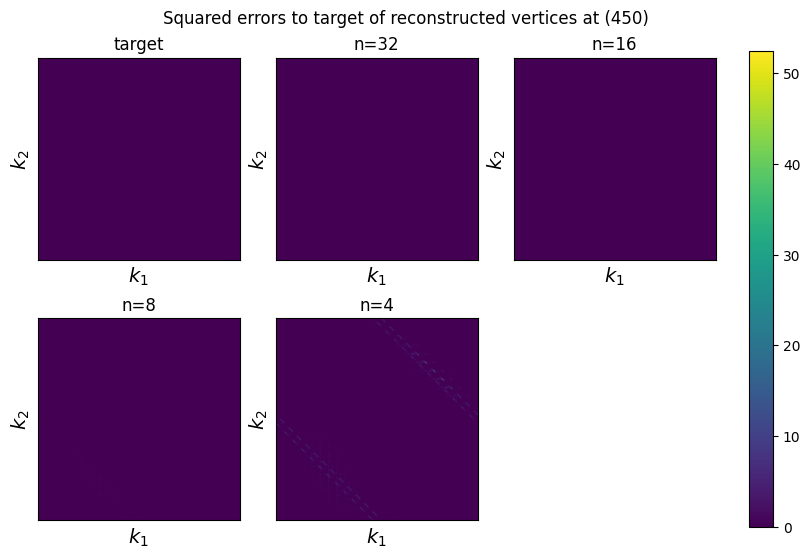

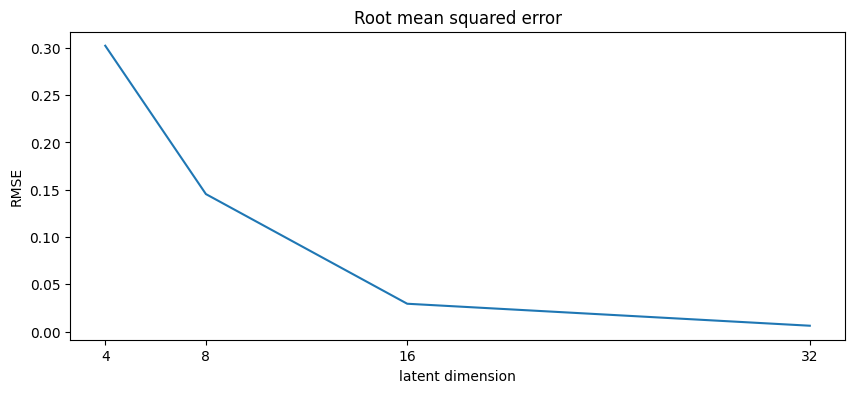

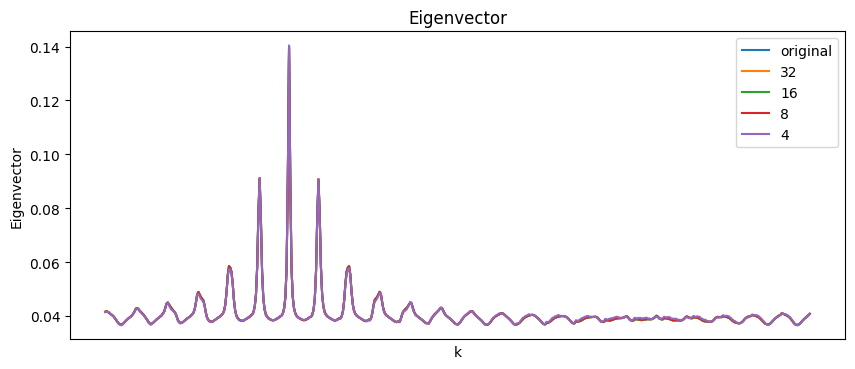

In [ ]:
# for 3d-data
slice_at = slice_idx_3d
verteval.evaluate_and_report(info, test_file3d, trainer, vertex3, slice_at, axis, keys, nrows, ncols, 
                             load_func=trainer.load_prediction)

## correlation analysis

load files:   0%|          | 0/51 [00:00<?, ?it/s]

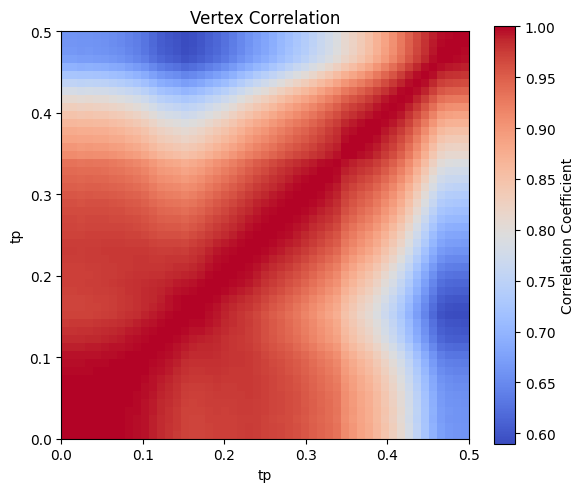

In [ ]:
cor_mat = verteval.vertex_correlation('../../../frgs_6d', pre_load_vertices=True)
vertvis.plot_correlation(cor_mat, "Vertex Correlation")

## phase classification

In [3]:
info_fn = 'eval_info.pkl'
info = verteval.load_info_dict(info_fn)

In [5]:
pc = PhaseClassification('../../../frgs_6d', info[1]['save_path'], samples_per_vertex=2000, test_size=0.1)
pc.train()

Load data:   0%|          | 0/45 [00:00<?, ?it/s]

Fit models:   0%|          | 0/2 [00:00<?, ?it/s]

[LibSVM]...........................
*..*.
*
optimization finished, #iter = 30072
obj = -42421.853805, rho = 2.930341
nSV = 46968, nBSV = 46628
......................
*...*
optimization finished, #iter = 25221
obj = -32915.630153, rho = 2.875136
nSV = 37873, nBSV = 37573
.............................
*..*.*
optimization finished, #iter = 32032
obj = -45679.913812, rho = -0.182601
nSV = 48421, nBSV = 48043
Total nSV = 79517


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of 100 | elapsed:    1.2s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


In [20]:
pc = PhaseClassification('../../../frgs_6d', info[1]['save_path'], samples_per_vertex=2000, test_size=0.1)

Load data:   0%|          | 0/45 [00:00<?, ?it/s]

Predict with sampling from known vertices:   0%|          | 0/2 [00:00<?, ?it/s]

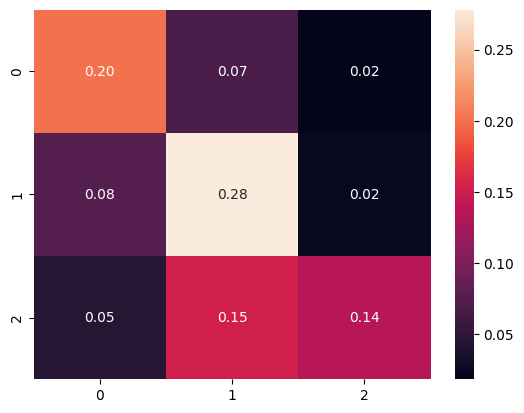

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.0s finished


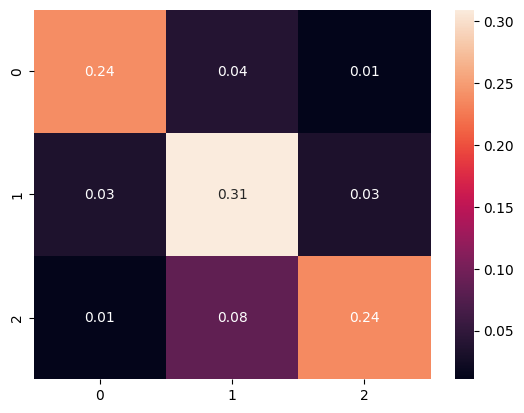

Predict with sampling from new vertices:   0%|          | 0/2 [00:00<?, ?it/s]

Load data:   0%|          | 0/6 [00:00<?, ?it/s]

/gpfs/opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-llm-training-v4/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


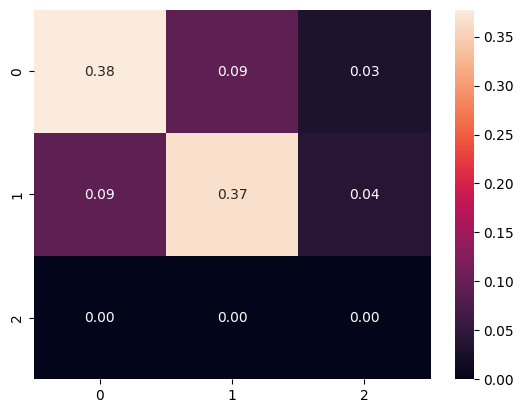

Load data:   0%|          | 0/6 [00:00<?, ?it/s]

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.0s finished
/gpfs/opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-llm-training-v4/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


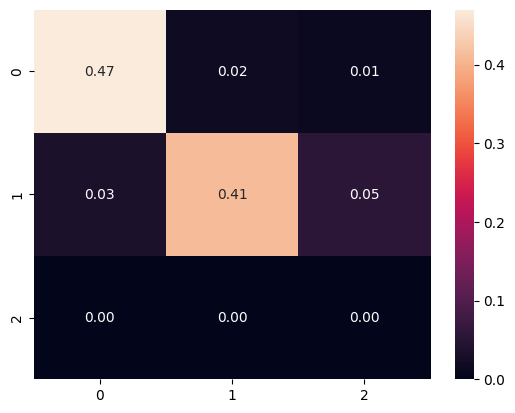

{'sampling from new vertices': {'SVC': ({'acc': np.float64(0.7446666666666666),
    'prec': 0.7446666666666667,
    'rec': 0.7446666666666667,
    'f1': 0.7446666666666667},
   array([[0.3775    , 0.09175   , 0.03075   ],
          [0.09241667, 0.36716667, 0.04041667],
          [0.        , 0.        , 0.        ]])),
  'RandomForestClassifier': ({'acc': np.float64(0.8819166666666667),
    'prec': 0.8819166666666667,
    'rec': 0.8819166666666667,
    'f1': 0.8819166666666667},
   array([[0.46966667, 0.01741667, 0.01291667],
          [0.03441667, 0.41225   , 0.05333333],
          [0.        , 0.        , 0.        ]]))},
 'sampling from known vertices': {'SVC': ({'acc': np.float64(0.6128227775286599),
    'prec': 0.6146146146146146,
    'rec': 0.6146146146146146,
    'f1': 0.6146146146146146},
   array([[0.201001  , 0.06936937, 0.01851852],
          [0.07537538, 0.27807808, 0.02432432],
          [0.04504505, 0.15275275, 0.13553554]])),
  'RandomForestClassifier': ({'acc': np.float

In [21]:
model_scores = pc.evaluate_classifiers(print_conf_mat=True)
model_scores

In [22]:
with open(f'phase_classification_results.pkl','wb') as f:
    pickle.dump(model_scores, f)

# 02 Training extent comparison

* excluding last vertex for testing
* compare different sample sizes and number of epochs

In [ ]:
info_fn = 'eval_info.pkl'
info = verteval.load_info_dict(info_fn)
hidden_dims = [128, 64, 32]

def init_trainer(device_type: Literal['cpu', 'gpu'] = 'gpu', **kwargs) -> VertexTrainer24x6:
    sample_count = int((2000 * 576 * 3) / (24 * 6))
    config_kwargs = {'path_train': '../../../frgs_6d', 
                     'hidden_dims': hidden_dims,
                     'epochs': 100,
                     'sample_count_per_vertex': sample_count, 
                     'test_ratio': 0.2, 
                     'subset': -1, 
                     'subset_shuffle': False, 
                     'devices': 'auto', 
                     'device_type': device_type,
                     'num_dataloader_workers': 8, 
                     'strategy': 'auto', 
                     'batch_size': 2048}
    for k, v in kwargs.items():
        config_kwargs[k] = v
    trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                                subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                                config_kwargs=config_kwargs)
    return trainer

## train

In [ ]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, hidden_dims)

In [ ]:
trainer = init_trainer(sample_count_per_vertex=2000, epochs=1000)
verteval.eval_train(trainer, info, info_fn, hidden_dims)

In [ ]:
trainer = init_trainer(sample_count_per_vertex=2000, epochs=100)
verteval.eval_train(trainer, info, info_fn, hidden_dims)

## evaluate prediction

In [ ]:
i = 18
axis = trainer.config.construction_axis
k, other_k = (axis + 1) // 2, 3
slice_idx_3d = i * 24 + i
nrows, ncols = 2, 3

test_file = 'tp0.020000_mu0.080000.h5'
test_file3d = '../../../frgs/' + test_file
test_file6d = '../../../frgs_6d/' + test_file

info = verteval.load_info_dict(info_fn)

vertex3 = AutoEncoderVertexDataset.load_from_file(test_file3d)
vertex6 = AutoEncoderVertex24x6Dataset.load_from_file(test_file6d)

keys = ['s=24000,e=100', 's=2000,e=1000', 's=2000,e=100']
trainer = init_trainer(device_type='cpu', batch_size=4096)

### predict 24x24 slice

In [ ]:
# RESULTS FOR 2-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i, i, i), axis, keys, nrows, ncols, 
                             trainer.predict_slice2d, fixed_idcs=(i, i, i, i))

### predict 576x576 slice

In [ ]:
# RESULTS FOR 4-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i), (k, other_k), keys, nrows, ncols, 
                             trainer.predict_slice4d, fixed_idcs=(i, i), other_k=other_k)

### predict full vertex

In [ ]:
# RESULTS FOR 6-DIMENSIONAL PREDICTION
# for 6d-data
slice_at = (i, i, i, i)
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, slice_at, axis, keys, nrows, ncols, 
                             predict_func=trainer.predict)

In [ ]:
# for 3d-data
slice_at = slice_idx_3d
verteval.evaluate_and_report(info, test_file3d, trainer, vertex3, slice_at, axis, keys, nrows, ncols, 
                             load_func=trainer.load_prediction)

## correlation analysis

In [ ]:
cor_mat = verteval.vertex_correlation('../../../frgs_6d', pre_load_vertices=True)
vertvis.plot_correlation(cor_mat, "Vertex Correlation")

# 03 Latent dimension evaluation

* use most efficient sample- and epoch-count
* compare different layer sizes

In [ ]:
info_fn = 'eval_info.pkl'
info = verteval.load_info_dict(info_fn)
config_kwargs = {'path_train': '../../../frgs_6d', 
                 'hidden_dims': [128, 64, 32],
                 'epochs': 100,
                 'sample_count_per_vertex': 2000, 
                 'test_ratio': 0.2, 
                 'subset': -1, 
                 'subset_shuffle': False, 
                 'devices': 'auto', 
                 'num_dataloader_workers': 8, 
                 'strategy': 'auto', 
                 'batch_size': 2048}


def init_trainer(device_type: Literal['cpu', 'gpu'] = 'gpu', **kwargs) -> VertexTrainer24x6:
    config_kwargs['device_type'] = device_type
    for k, v in kwargs.items():
        config_kwargs[k] = v
    trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                                subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                                config_kwargs=config_kwargs)
    return trainer

## train

In [ ]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32])

In [ ]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32, 16])

In [ ]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32, 8])

In [ ]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 32, 16, 4])

## evaluate prediction

In [ ]:
i = 18
axis = trainer.config.construction_axis
k, other_k = (axis + 1) // 2, 3
slice_idx_3d = i * 24 + i
nrows, ncols = 2, 3

test_file = 'tp0.020000_mu0.080000.h5'
test_file3d = '../../../frgs/' + test_file
test_file6d = '../../../frgs_6d/' + test_file

info = verteval.load_info_dict(info_fn)

vertex3 = AutoEncoderVertexDataset.load_from_file(test_file3d)
vertex6 = AutoEncoderVertex24x6Dataset.load_from_file(test_file6d)

keys = [f'n={x['latent_dim']}' for x in info]
trainer = init_trainer(device_type='cpu', batch_size=4096)

### predict 24x24 slice

In [ ]:
# RESULTS FOR 2-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i, i, i), axis, keys, nrows, ncols, 
                             trainer.predict_slice2d, fixed_idcs=(i, i, i, i))

### predict 576x576 slice

In [ ]:
# RESULTS FOR 4-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i), (k, other_k), keys, nrows, ncols, 
                             trainer.predict_slice4d, fixed_idcs=(i, i), other_k=other_k)

### predict full vertex

In [ ]:
# RESULTS FOR 6-DIMENSIONAL PREDICTION
# for 6d-data
slice_at = (i, i, i, i)
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, slice_at, axis, keys, nrows, ncols, 
                             predict_func=trainer.predict)

In [ ]:
# for 3d-data
slice_at = slice_idx_3d
verteval.evaluate_and_report(info, test_file3d, trainer, vertex3, slice_at, axis, keys, nrows, ncols, 
                             load_func=trainer.load_prediction)

## correlation analysis

In [ ]:
cor_mat = verteval.vertex_correlation('../../../frgs_6d', pre_load_vertices=True)
vertvis.plot_correlation(cor_mat, "Vertex Correlation")

# 04 Sparse matrix training

In [ ]:
from phys_ml.load_data.vertex import convert_6d_to_sparse_vertex

info_fn = 'eval_info.pkl'
info = verteval.load_info_dict(info_fn)
hidden_dims = [128, 64, 32]
config_kwargs = {'hidden_dims': hidden_dims,
                 'epochs': 100,
                 'sample_count_per_vertex': 2000, 
                 'sparsify_rate': 0.8,
                 'test_ratio': 0.2, 
                 'subset': -1, 
                 'subset_shuffle': False, 
                 'devices': 'auto', 
                 'num_dataloader_workers': 4, 
                 'strategy': 'auto', 
                 'batch_size': 128}


def init_trainer(device_type: Literal['cpu', 'gpu'] = 'gpu', **kwargs) -> VertexTrainer24x6:
    config_kwargs['device_type'] = device_type
    for k, v in kwargs.items():
        config_kwargs[k] = v
    trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                                subconfig_name='AUTO_ENCODER_VERTEX_24X6_SPARSE', 
                                config_kwargs=config_kwargs)
    return trainer

## train

In [ ]:
path_train = '../../../frgs_6d_sparse80'
if not os.path.exists(path_train):
    convert_6d_to_sparse_vertex(path_train, 0.8)

trainer_sparse = init_trainer(path_train=path_train)
verteval.eval_train(trainer_sparse, info, info_fn, hidden_dims)

In [ ]:
path_train = '../../../frgs_6d_sparse90'
if not os.path.exists(path_train):
    convert_6d_to_sparse_vertex(path_train, 0.9)

trainer_sparse = init_trainer(path_train=path_train)
verteval.eval_train(trainer_sparse, info, info_fn, hidden_dims)

## evaluate

In [ ]:
test_file = 'tp0.020000_mu0.080000.h5'
test_file3d = '../../../frgs/' + test_file

info = verteval.load_info_dict(info_fn)
vertex3 = AutoEncoderVertexDataset.load_from_file(test_file3d)

keys = [r'80% sparse', r'90% sparse']
trainer_sparse = init_trainer(device_type='cpu', batch_size=4096)

i = 18
axis = trainer_sparse.config.construction_axis
k, other_k = (axis + 1) // 2, 3
slice_idx_3d = i * 24 + i
nrows, ncols = 1, 3

In [ ]:
slice_at = slice_idx_3d
verteval.evaluate_and_report(info, test_file3d, trainer, vertex3, slice_at, axis, keys, nrows, ncols, 
                             predict_func=trainer.predict_3d)

# ---